<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/8/8_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8.3 トピックモデルを用いた文章の分類
- 目的
    - 
- 参考
    - 本コードは以下のサイトを参考にしました
    - https://www.sejuku.net/blog/67863

In [1]:
import gensim
import numpy as np
from collections import Counter
from sklearn import datasets
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords

In [2]:
print("Loading dataset...")
twenty_news = datasets.fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))

Loading dataset...


In [3]:
# 最初の文章を表示
twenty_news.data[0]

"Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"

In [4]:
# クラス一覧
twenty_news.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
# 最初の文のクラスの番号とクラス名を表示
print(twenty_news.target[0], twenty_news.target_names[twenty_news.target[0]])

17 talk.politics.mideast


In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# Stopwords（文脈によらず一般的に使われる情報の少ない単語）を文章から削除し、単語ごとに分ける
docs = twenty_news.data
sw = set(stopwords.words())
texts = [
    [w for w in doc.lower().split() if w not in sw]
        for doc in docs
]

In [8]:
# 最初の文の先頭の20単語を表示
texts[0][:20]

['well',
 "i'm",
 'sure',
 'story',
 'seem',
 'biased.',
 'disagree',
 'statement',
 'u.s.',
 'media',
 'ruin',
 'israels',
 'reputation.',
 'rediculous.',
 'u.s.',
 'media',
 'pro-israeli',
 'media',
 'world.',
 'lived']

In [9]:
# 頻出単語のカウント
count = Counter(w for doc in texts for w in doc)
count.most_common()[:10]

[('-', 6200),
 ('would', 6074),
 ('x', 4688),
 (':', 3649),
 ('like', 3624),
 ('get', 3447),
 ('people', 3387),
 ("max>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'", 3289),
 ('--', 3241),
 ('1', 3006)]

In [10]:
dictionary = gensim.corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [11]:
# 各単語のIDを表示（先頭10個）
for i, (k, v) in enumerate(dictionary.token2id.items()):
    print(k, v)
    if i == 10:
        break

(at 0
acts 1
all, 2
atrocities. 3
austria, 4
away. 5
biased. 6
blessing 7
clearly 8
commited 9
daily 10


In [12]:
# 先頭の文章に各IDの単語が何回出現するか
corpus[0][:10]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1)]

In [13]:
# 出現頻度の低い単語を除去
num_tokens = len(count.most_common())
N = int(num_tokens*0.05)
max_frequency = count.most_common()[N][1]
 
corpus = [[w for w in doc if max_frequency > w[1] >= 3] for doc in corpus]

In [14]:
corpus[0]

[(34, 4), (59, 4)]

In [15]:
# LDAを用いてトピックモデリング
# よく共通して出現する単語を用いて文章をクラスタリング
# ここでは20種類の文章があるものとする
num_topics = 20
 
lda = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    num_topics=num_topics,
    id2word=dictionary
)

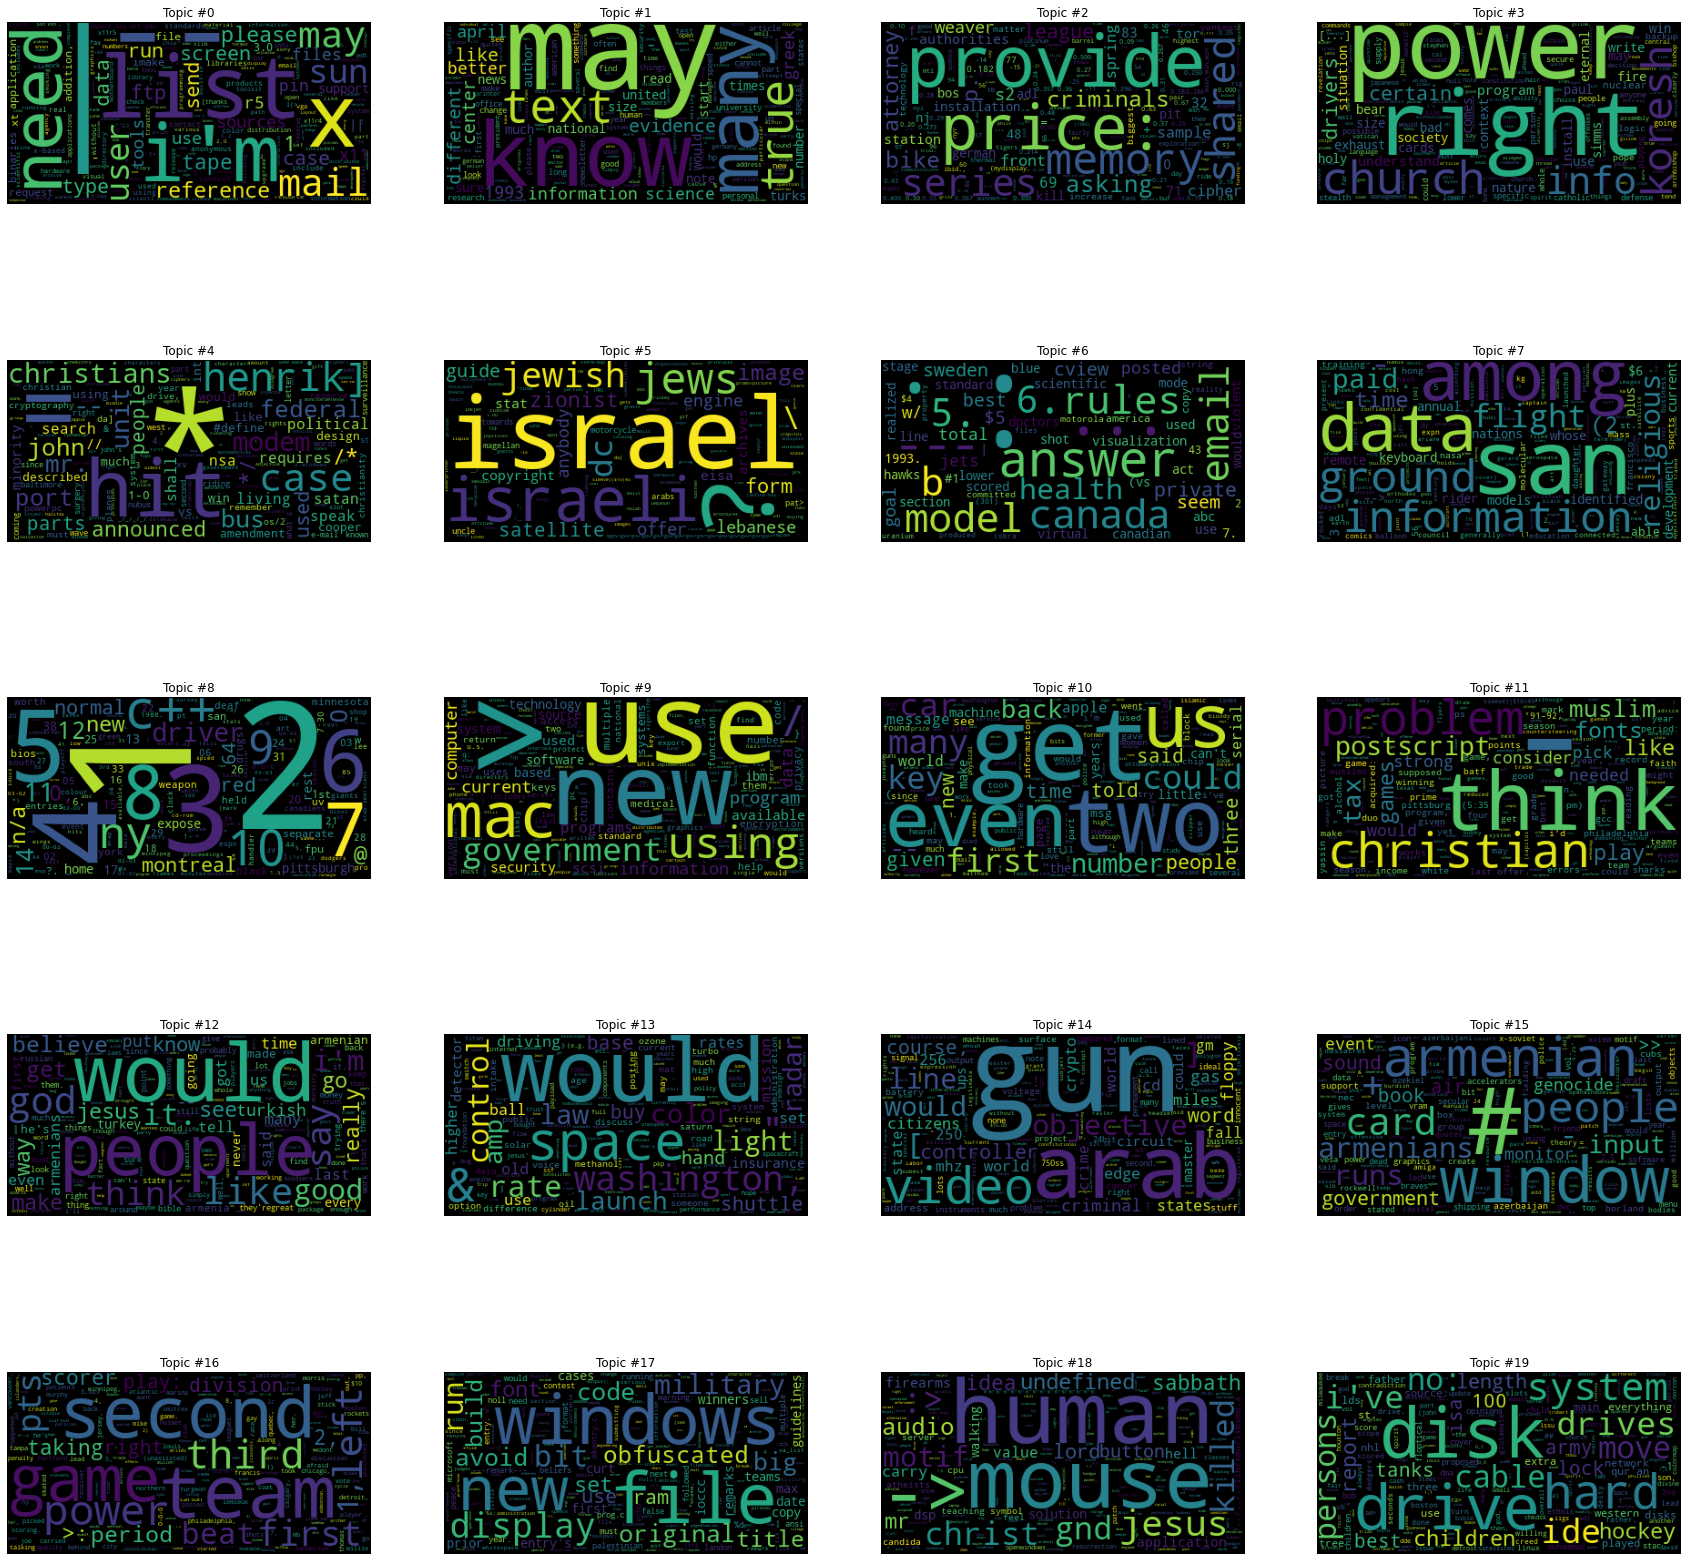

In [16]:
# 各トピックにおいて、単語の頻出度合いに応じてWord Cloudを生成
plt.figure(figsize=(30,30))
for t in range(lda.num_topics):
    plt.subplot(5,4,t+1)
    x = dict(lda.show_topic(t,200))
    im = WordCloud().generate_from_frequencies(x)
    plt.imshow(im)
    plt.axis("off")
    plt.title("Topic #" + str(t))
    
plt.show()